In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/twitter_training.csv.zip')
print('dataset is loaded !!')

dataset is loaded !!


In [7]:
print('1st five rows of dataset:')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
print('last five rows of dataset :')
df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [7]:
print('rows and columns in dataset respectively:')
df.shape

(74681, 4)

In [24]:
print(f'diffrent columns names in dataset :{df.columns}')

diffrent columns names in dataset :Index(['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_content'], dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
#rename the columns for easy understanding
df.rename(columns={ df.columns[0]: "Tweet_ID", df.columns[1]: "Entity", df.columns[2]: "Sentiment", df.columns[3]: "Tweet_content"}, inplace = True)

df.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [25]:
print('null/missing values count in dataset:')
df.isnull().sum()

null/missing values count in dataset:


,0
Tweet_ID,0
Entity,0
Sentiment,0
Tweet_content,0


In [12]:
#removing null/missing values
df.dropna(subset=['Tweet_content'], inplace=True)
df.isnull().sum()

,0
Tweet_ID,0
Entity,0
Sentiment,0
Tweet_content,0


In [5]:
# droping dupicate values
df.drop_duplicates(inplace=True)
df.shape

(71981, 4)

In [5]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

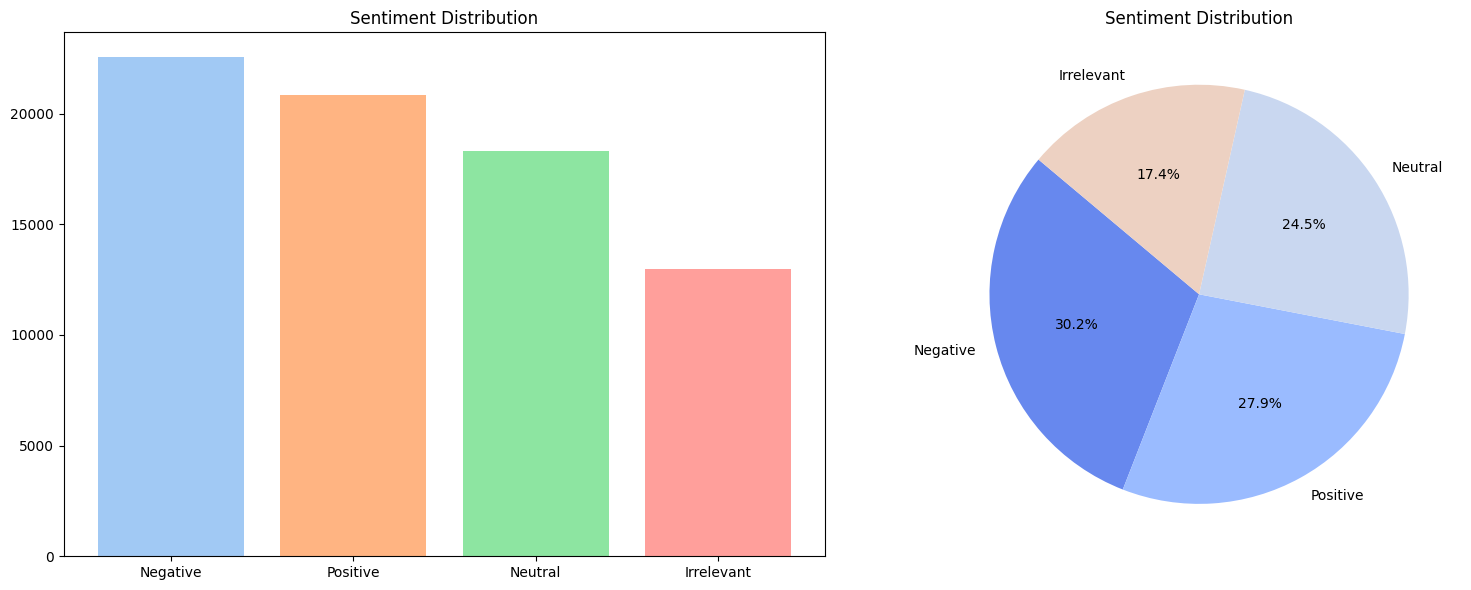

In [23]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

sentiment_counts = df['Sentiment'].value_counts()

ax[0].bar(sentiment_counts.index, sentiment_counts.values, color=sns.color_palette('pastel'))
ax[0].set_title('Sentiment Distribution')

sentiment_counts = df['Sentiment'].value_counts()

ax[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
ax[1].set_title('Sentiment Distribution')


plt.tight_layout()
plt.show()


### 📊 Sentiment Distribution Analysis

#### **Left: Bar Chart – Sentiment Distribution**
- **Negative sentiment** is the highest category, with around **23,000 tweets**.
- **Positive sentiment** follows closely with slightly over **21,000 tweets**.
- **Neutral sentiment** is third, with about **18,000 tweets**.
- **Irrelevant tweets** are the least frequent, at roughly **13,000 tweets**.

> 📌 This bar chart shows that negative tweets dominate the conversation, but there’s still a significant amount of positive and neutral content.

---

#### **Right: Pie Chart – Sentiment Distribution (Percentage)**
- **Negative:** 30.2%
- **Positive:** 27.9%
- **Neutral:** 24.5%
- **Irrelevant:** 17.4%

> 🧩 This chart provides a proportional view, confirming that almost one-third of all tweets are negative. However, positive sentiment isn't far behind, suggesting a fairly balanced but slightly pessimistic tone overall.

---

#### ✅ **Key Takeaways**
- **Negative sentiment** is the most common, indicating widespread criticism or dissatisfaction in the data source.
- **Positive and neutral tweets** make up over half of the total, showing that not all discourse is negative.
- A notable portion of the tweets is **irrelevant** — possibly spam, off-topic, or contextless.
''')


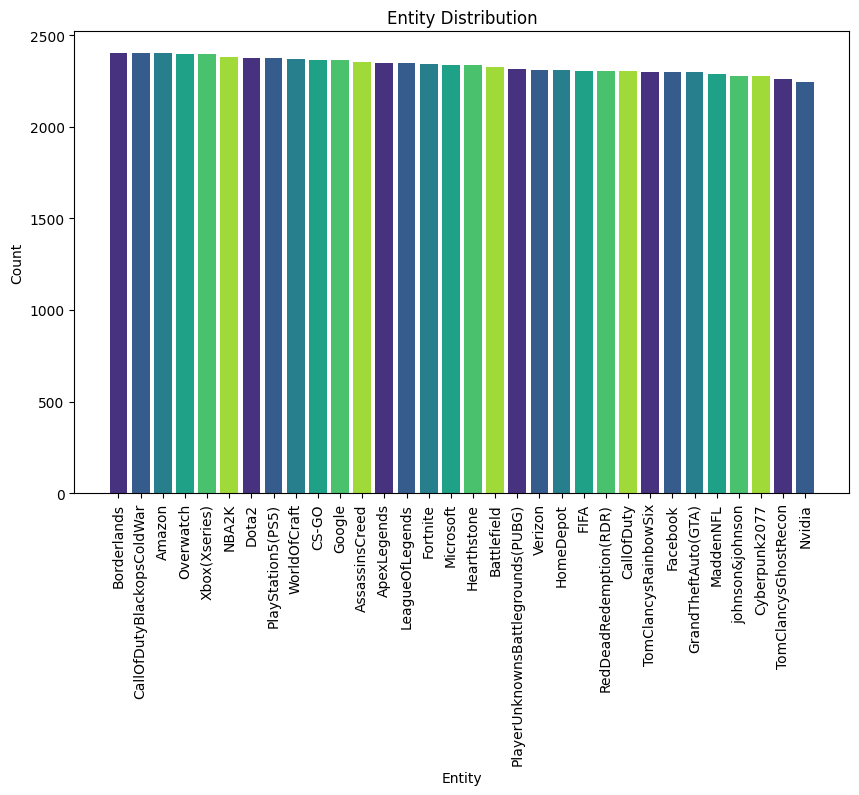

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(df['Entity'].unique(), df['Entity'].value_counts(), color = sns.color_palette('viridis'))
plt.xlabel('Entity')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Entity Distribution')
plt.show()


### 📊 Entity Distribution Analysis

This bar chart titled **"Entity Distribution"** displays the count of occurrences for different entities — likely names of video games, gaming platforms, companies, or brands — across some dataset.

---

#### ✅ **Axes Explanation:**

**X-axis (Entity):**  
Represents various named entities like *PlayStation*, *Google*, *LeagueOfLegends*, *TomClancyGhostRecon*, etc.

**Y-axis (Count):**  
Shows how many times each of these entities appeared in the dataset.

---

#### ✅ **Interpretation:**

All entities have a count just under or around **2400** — meaning the dataset is **evenly distributed** among the listed entities.

📌 This type of **uniform distribution** often implies that:

- The data was either **sampled evenly on purpose**, or  
- These entities are **equally represented** in whatever source the data was extracted from (e.g., social media, news articles, game forums, etc.).
''')


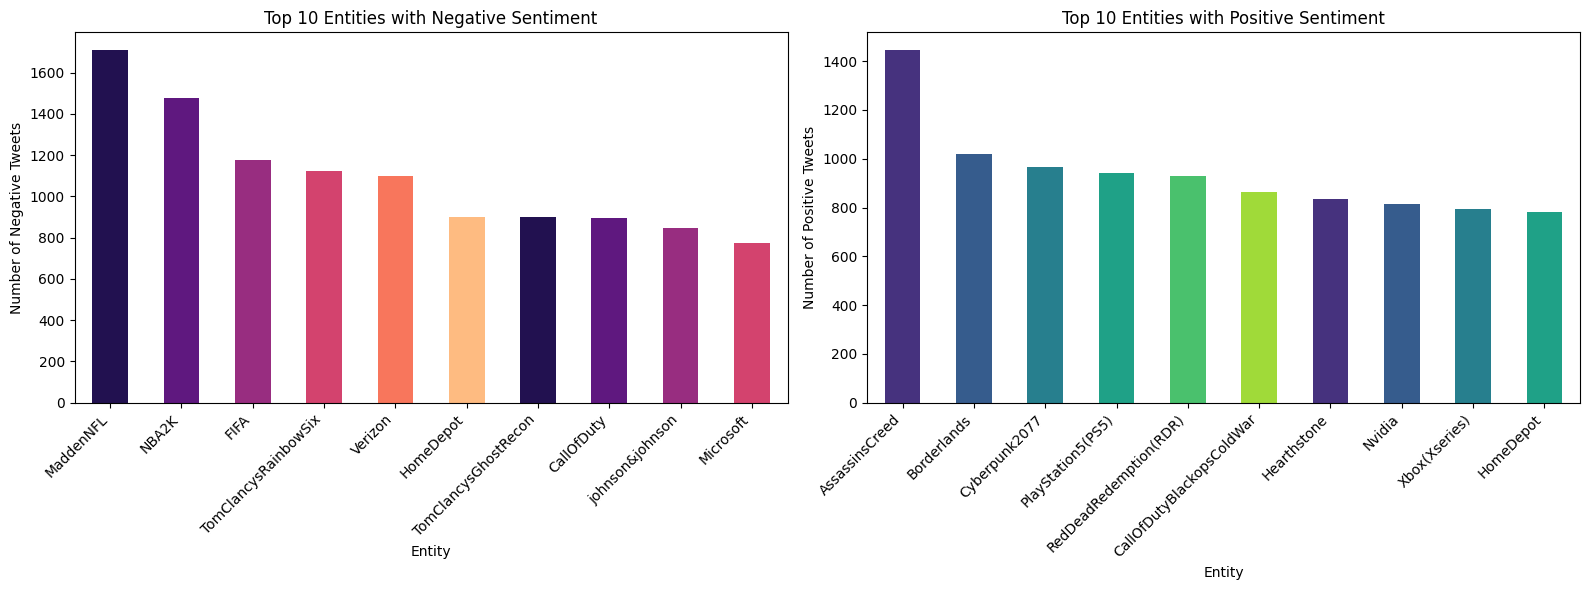

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

negative_tweets_df = df[df['Sentiment'] == 'Negative']
negative_entity_counts = negative_tweets_df['Entity'].value_counts()

negative_entity_counts.head(10).plot(kind='bar', color=sns.color_palette('magma'), ax=ax[0])
ax[0].set_title('Top 10 Entities with Negative Sentiment')
ax[0].set_xlabel('Entity')
ax[0].set_ylabel('Number of Negative Tweets')

ax[0].set_xticklabels(negative_entity_counts.head(10).index, rotation=45, ha='right')


positive_tweets_df = df[df['Sentiment'] == 'Positive']
positive_entity_counts = positive_tweets_df['Entity'].value_counts()

positive_entity_counts.head(10).plot(kind='bar', color=sns.color_palette('viridis'), ax=ax[1])
ax[1].set_title('Top 10 Entities with Positive Sentiment')
ax[1].set_xlabel('Entity')
ax[1].set_ylabel('Number of Positive Tweets')
ax[1].set_xticklabels(positive_entity_counts.head(10).index, rotation=45, ha='right')


plt.tight_layout()
plt.show()


### 📉📈 Sentiment Breakdown by Entity

---

#### **Left Chart: Top 10 Entities with Negative Sentiment**

This chart displays the entities that received the highest number of **negative tweets**.

🟥 **Top 3 entities:**
- **MaddenNFL** (highest negativity)
- **NBA2K**
- **FIFA**

Other notable entities with high negativity:
- *TomClancysRainbowSix*
- *Verizon*
- *HomeDepot*
- *Microsoft*

> ⚠️ These entities are likely receiving **criticism or dissatisfaction** from users on Twitter.

---

#### **Right Chart: Top 10 Entities with Positive Sentiment**

This chart highlights the entities with the most **positive tweets**.

🟩 **Top 3 entities:**
- **AssassinsCreed** (most praised)
- **Borderlands**
- **Cyberpunk2077**

Other well-received entities:
- *PlayStation5 (PS5)*
- *RedDeadRedemption (RDR)*
- *CallofDutyBlackOpsColdWar*
- *Xbox (XSeries)*
- *HomeDepot* (appears in both lists)

---

### 🔍 Key Insights:

- **HomeDepot** appears in **both** positive and negative lists, suggesting **mixed public sentiment**.
- The **Call of Duty** franchise shows up in **both charts** under different titles:
  - Negative: *CallofDuty*
  - Positive: *CallofDutyBlackOpsColdWar*
  - 🧠 This implies **variation in perception** across different games in the same franchise.
- **Gaming-related entities dominate** both lists, highlighting Twitter as a key platform for expressing **video game experiences — both good and bad**.
''')
